### Questions
- What characteristics do sequences where the oracle has an accuracy under 50% have in common?

### To Do
- Hyperparameter search for the best fixed and vary models

### Setup

In [17]:
import os, sys
from pprint import pprint
import matplotlib.pyplot as plt
plt.style.use('ggplot')

for module in ['actions', 'models']:
    path = os.path.join(os.getcwd(), '..', module)
    sys.path.append(os.path.abspath(path))

from oracle import oracle
from load_data import load_data
from randomness import test_randomness

### Load Data

In [18]:
train_data, eval_data, test_data = load_data()

### Aaronson Oracle Results (Baseline)

In [19]:
all_trials = train_data + eval_data + test_data

sorted_trials_by_length = sorted(all_trials, key=len)

sorted_trials_by_ac_value = sorted(all_trials, key=lambda x: test_randomness(x)['autocorrelation'])

sorted_trials_by_chi_value = sorted(all_trials, key=lambda x: test_randomness(x)['chi2_pvalue'])

sorted_trials_by_mkv_value = sorted(all_trials, key=lambda x: test_randomness(x)['markov_kldg'])

sorted_trials_by_runs_value = sorted(all_trials, key=lambda x: test_randomness(x)['runs_pvalue'])

In [20]:
lengths = []
ac_values = []
chi_values = []
mkv_values = []
runs_values = []

for i, t in enumerate(test_data):
    print(f'Trial {i+1}')
    
    length = len(t)
    lengths.append(length)
    print(f'Length: {length}')
    
    results = test_randomness(t)
    ac_values.append(results['autocorrelation'])
    chi_values.append(results['chi2_pvalue'])
    mkv_values.append(results['markov_kldg'])
    runs_values.append(results['runs_pvalue'])
    pprint(results)
    print('\n')

Trial 1
Length: 489
{'autocorrelation': 0.0324808549211849,
 'chi2_pvalue': 0.6840123446798727,
 'markov_kldg': 0.22871627403959569,
 'runs_pvalue': 3.255609734079404e-23}


Trial 2
Length: 122
{'autocorrelation': -0.03266001946669358,
 'chi2_pvalue': 0.0701849919664927,
 'markov_kldg': 0.030320087197142145,
 'runs_pvalue': 0.23454385598268634}


Trial 3
Length: 248
{'autocorrelation': 0.02188144893483732,
 'chi2_pvalue': 0.0034890655619424743,
 'markov_kldg': 0.13231518882125698,
 'runs_pvalue': 3.298128573888459e-07}


Trial 4
Length: 318
{'autocorrelation': -0.020959447954692675,
 'chi2_pvalue': 0.9107009600697374,
 'markov_kldg': 0.011001727025980013,
 'runs_pvalue': 0.07216340563340022}


Trial 5
Length: 148
{'autocorrelation': -0.03443185556974277,
 'chi2_pvalue': 0.1389824602931814,
 'markov_kldg': 0.24426106711031503,
 'runs_pvalue': 1.1045494828733563e-06}


Trial 6
Length: 214
{'autocorrelation': -0.028740568845784954,
 'chi2_pvalue': 0.10087918199322322,
 'markov_kldg': 0.06

In [55]:
windows = [3, 4, 5, 6, 7, 8]
results = oracle(windows, all_trials, logging=False)
accuracies = {r: round(results[r]['accuracy'], 2) for r in results}
best_window = max(accuracies, key=accuracies.get)
print(f'Best window: {best_window}, Accuracy: {accuracies[best_window]}')

Best window: 5, Accuracy: 56.49


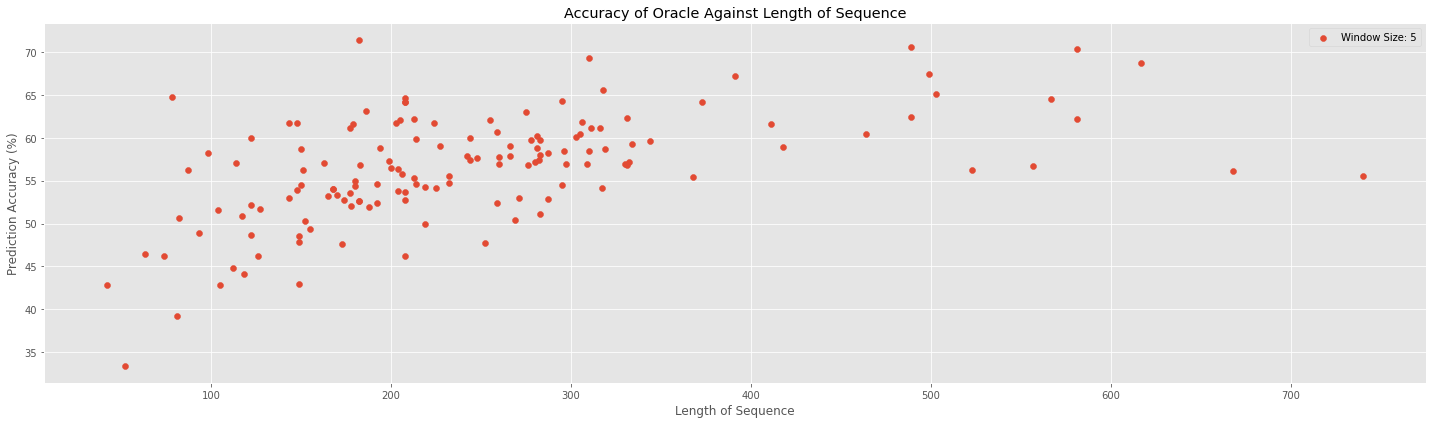

In [52]:
results = oracle(best_window, sorted_trials_by_length, logging=False)

lengths = [len(trial) for trial in sorted_trials_by_length]
trial_accuracies = [results[best_window][t+1]['accuracies'][-1] for t in range(len(all_trials))]

plt.figure(figsize=(20, 6))
plt.scatter(lengths, trial_accuracies, label=f'Window Size: {best_window}')
plt.xlabel('Length of Sequence')
plt.ylabel('Prediction Accuracy (%)')
plt.title('Accuracy of Oracle Against Length of Sequence')
plt.legend()
plt.tight_layout()
plt.show()

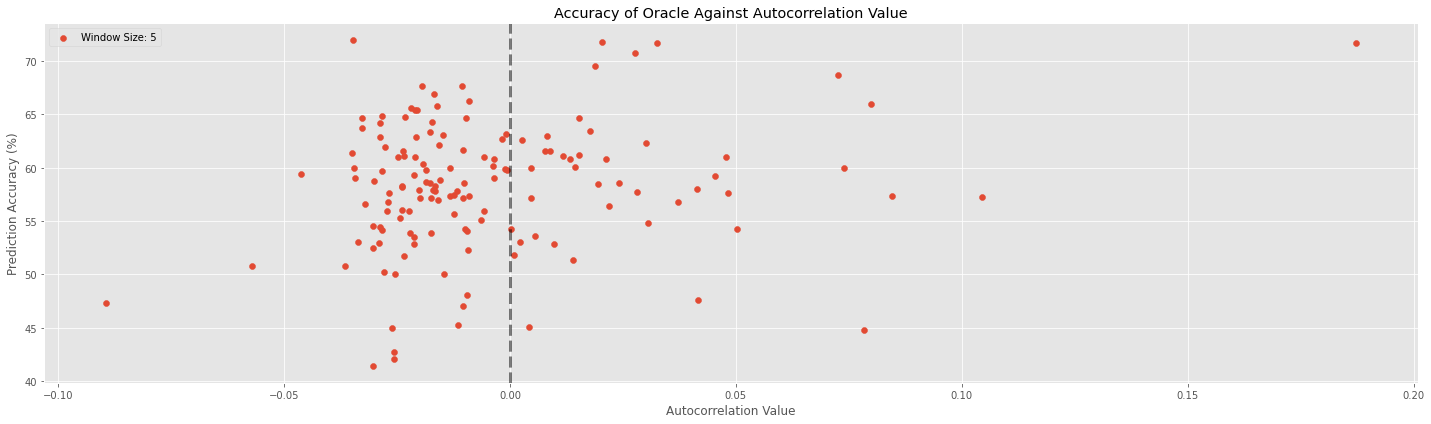

In [46]:
results = oracle(best_window, sorted_trials_by_ac_value, cutoff=True, logging=False)
ac_values = [test_randomness(trial)["autocorrelation"] for trial in sorted_trials_by_ac_value]

# set figure size
plt.figure(figsize=(20, 6))

for window in results:
    trial_accuracies = [results[window][t+1]['accuracies'][-1] for t in range(len(all_trials))]
    plt.scatter(ac_values, trial_accuracies, label=f'Window Size: {window}')

plt.xlabel('Autocorrelation Value')
# place a dotter line at 0 for reference
plt.axvline(x=0, color='k', linestyle='--', linewidth=3, alpha=0.5)

plt.ylabel('Prediction Accuracy (%)')
plt.title('Accuracy of Oracle Against Autocorrelation Value')
plt.legend()
plt.tight_layout()
plt.savefig('plots/autocorrelation.png')
plt.show()

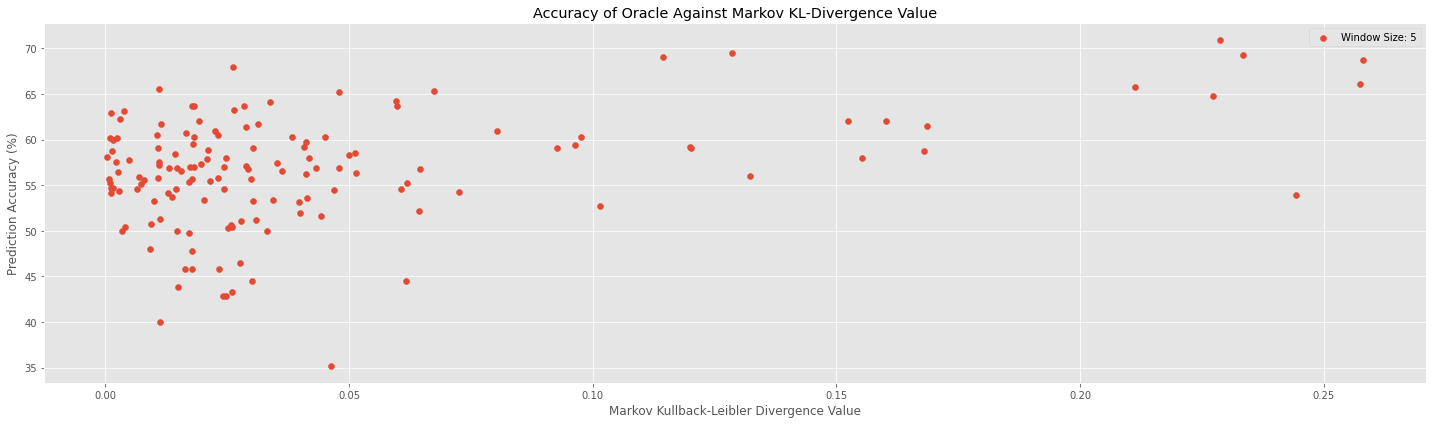

In [24]:
results = oracle(best_window, sorted_trials_by_mkv_value, logging=False)
mkv_values = [test_randomness(trial)["markov_kldg"] for trial in sorted_trials_by_mkv_value]

# set figure size
plt.figure(figsize=(20, 6))

for window in results:
    trial_accuracies = [results[window][t+1]['accuracies'][-1] for t in range(len(all_trials))]
    plt.scatter(mkv_values, trial_accuracies, label=f'Window Size: {window}')

plt.xlabel('Markov Kullback-Leibler Divergence Value')
plt.ylabel('Prediction Accuracy (%)')
plt.title('Accuracy of Oracle Against Markov KL-Divergence Value')
plt.legend()
plt.tight_layout()
plt.savefig('plots/markovkld.png')
plt.show()

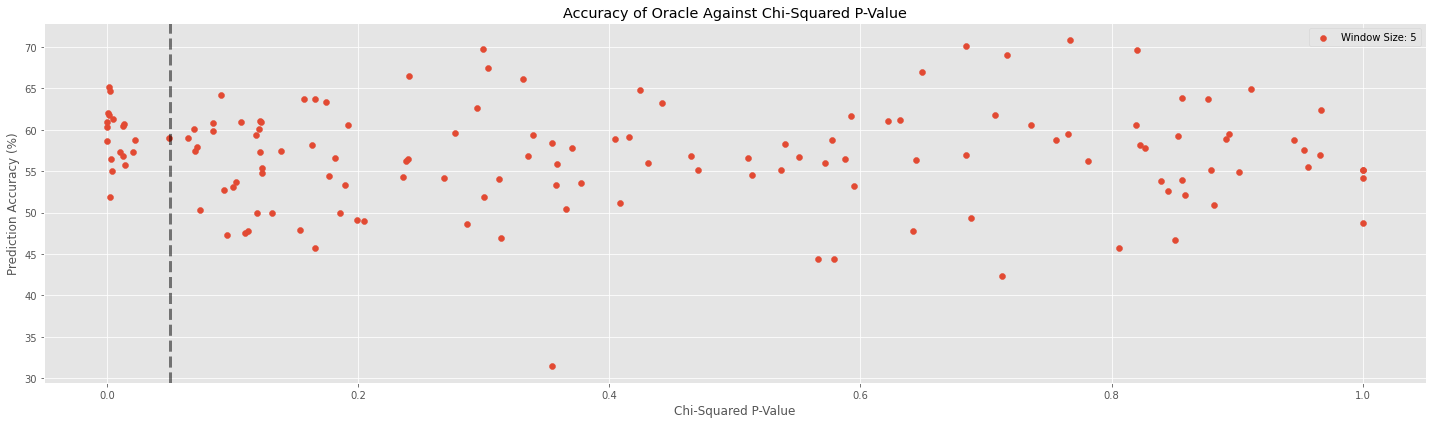

In [27]:
results = oracle(best_window, sorted_trials_by_chi_value, logging=False)
chi_values = [test_randomness(trial)["chi2_pvalue"] for trial in sorted_trials_by_chi_value]

# set figure size
plt.figure(figsize=(20, 6))

for window in results:
    trial_accuracies = [results[window][t+1]['accuracies'][-1] for t in range(len(all_trials))]
    plt.scatter(chi_values, trial_accuracies, label=f'Window Size: {window}')

# place a dotted line at p=0.05
plt.axvline(x=0.05, color='k', linestyle='--', linewidth=3, alpha=0.5)
plt.xlabel('Chi-Squared P-Value')
plt.ylabel('Prediction Accuracy (%)')
plt.title('Accuracy of Oracle Against Chi-Squared P-Value')
plt.legend()
plt.tight_layout()
plt.savefig('plots/chisquared.png')
plt.show()

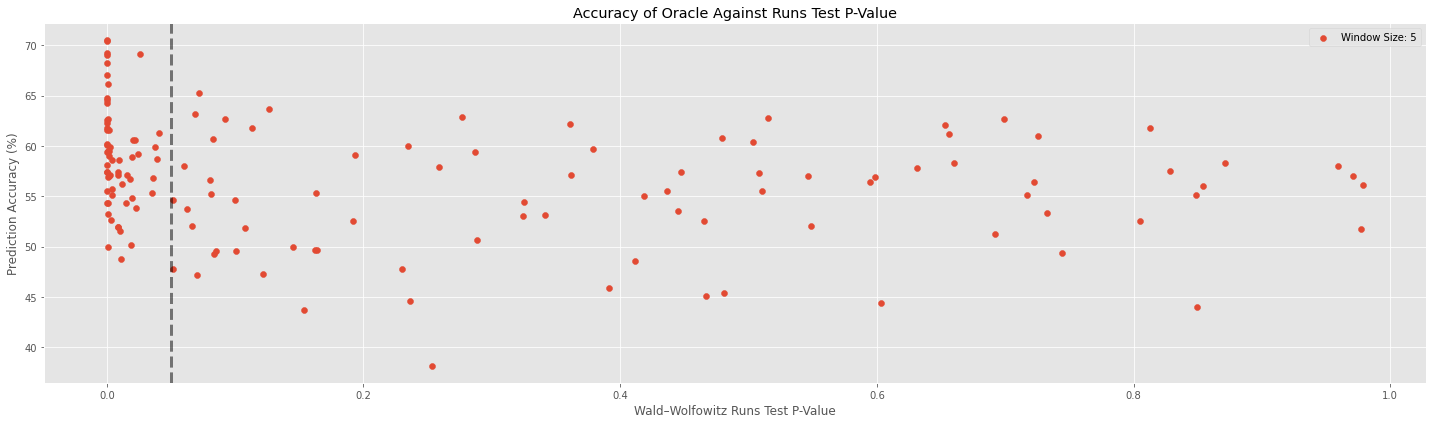

In [28]:
results = oracle(best_window, sorted_trials_by_runs_value, logging=False)
runs_values = [test_randomness(trial)["runs_pvalue"] for trial in sorted_trials_by_runs_value]

# set figure size
plt.figure(figsize=(20, 6))

for window in results:
    trial_accuracies = [results[window][t+1]['accuracies'][-1] for t in range(len(all_trials))]
    plt.scatter(runs_values, trial_accuracies, label=f'Window Size: {window}')

# place a dotted line at p=0.05
plt.axvline(x=0.05, color='k', linestyle='--', linewidth=3, alpha=0.5)
plt.xlabel('Wald–Wolfowitz Runs Test P-Value')
plt.ylabel('Prediction Accuracy (%)')
plt.title('Accuracy of Oracle Against Runs Test P-Value')
plt.legend()
plt.tight_layout()
plt.savefig('plots/wwruns.png')
plt.show()